In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [6]:
df.pivot_table(values = 'salary_year_avg', index='job_country',columns = 'job_title_short', aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [7]:
# we will mkae a pivot table to see the median salary by job title and top 6 countries
top_countries = df['job_country'].value_counts().head(6).index
top_countries 

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

In [8]:
df_job_country_salary = df.pivot_table(values = 'salary_year_avg', index='job_country',columns = 'job_title_short', aggfunc='median')
df_job_country_salary = df_job_country_salary.loc[top_countries] # .loc because we are using index
df_job_country_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.0,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0
France,89100.0,105968.0,69175.0,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.0,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0
Spain,86400.0,89100.0,91977.0,133000.0,88128.0,101029.0,111175.0,147500.0,157500.0,77050.0


In [9]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']
df_job_country_salary = df_job_country_salary[job_titles]
df_job_country_salary

job_title_short,Data Scientist,Data Engineer,Data Analyst
job_country,,,
United States,130000.0,125000.0,90000.0
India,114008.0,147500.0,100500.0
United Kingdom,105300.0,110000.0,87750.0
France,88128.0,98301.5,69175.0
Germany,131560.0,147500.0,103750.0
Spain,88128.0,133000.0,91977.0


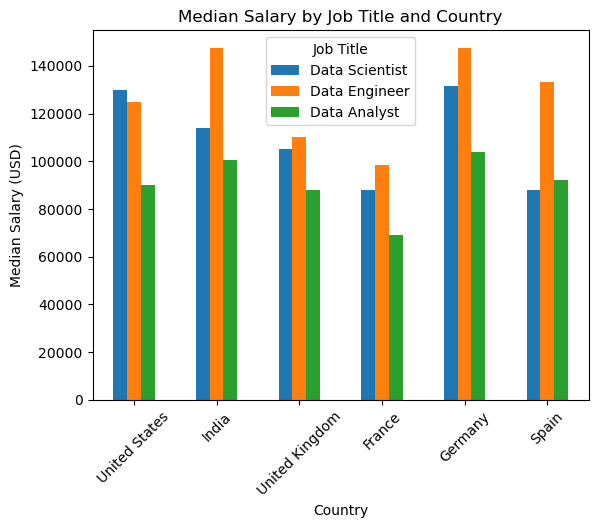

In [15]:
df_job_country_salary.plot(kind='bar')
plt.title('Median Salary by Job Title and Country')
plt.ylabel('Median Salary (USD)')   
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Job Title')

